# Imports

In [10]:
import random
import json
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import norm

%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Player.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Street.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Utility.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Station.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Chance.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Tax.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Go.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Jail.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\FreeParking.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\GoToJail.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\CommunityChest.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\MonopolyBoard.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Strategy.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\RandomStrategy.py"

%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\MonopolyBoardMCTS.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\Node.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\MCTS.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\State.py"

random.seed(42)

# Game Rollouts - Random Strategy

In [2]:
def game():
    # create board and add players
    board = MonopolyBoardMCTS()
    agent = Player('Agent')
    player = Player('Player')
    board.add_agent(agent)
    board.add_other_player(player)

    # using a random strategy
    strategy = RandomStrategy()
    board.strategy = strategy

    # run MCTS game
    root_state = State()
    root_state.from_monopoly_board(board)
    mcts = MCTS(root_state, max_iterations=100, exploration_weight=2**0.5, max_simulations=50)
    mcts.run_game(max_actions=5000)

    return mcts.root.state.rounds, mcts.root.state.agent, mcts.root.state.other_players[0], \
        mcts.root.state.properties, mcts.root.state.stations, mcts.root.state.utilities

In [3]:
random.seed(42)
num_games = 100
game_outcomes = {'Rounds': [], 'Agent': [], 'Other player(s)': [], 'Properties': [], 'Stations': [], 'Utilities': []}

for _ in range(num_games):
    rounds, agent, other_players, properties, stations, utilities = game()
    game_outcomes['Rounds'].append(rounds)
    game_outcomes['Agent'].append(agent)
    game_outcomes['Other player(s)'].append(other_players)
    game_outcomes['Properties'].append(properties)
    game_outcomes['Stations'].append(stations)
    game_outcomes['Utilities'].append(utilities)

Running MCTS game:  41%|████      | 2058/5000 [07:36<10:52,  4.51it/s]  


In [6]:
file_path = 'MCTS_RandomStrategy_100_game_outcomes.json'
with open(file_path, 'w') as json_file:
    json.dump(game_outcomes, json_file, indent=4)

## Analysing Game Rollouts

In [25]:
file_path = 'MCTS_RandomStrategy_100_game_outcomes.json'
with open(file_path, 'r') as json_file:
    game_outcomes = json.load(json_file)

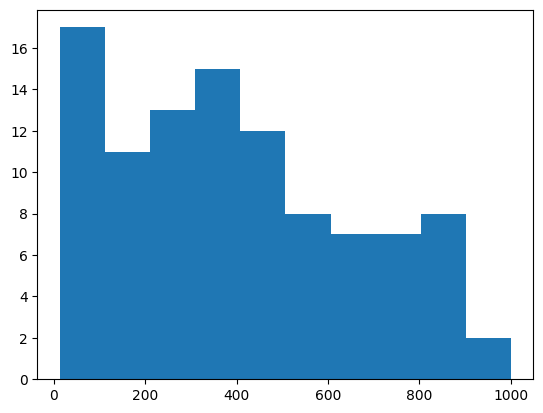

In [29]:
plt.hist(game_outcomes['Rounds'])
plt.show()

In [28]:
agent_losses = sum([agent[3] for agent in game_outcomes['Agent']])
agent_wins = sum([agent[3] for agent in game_outcomes['Other player(s)']])
game_not_ended = 100 - agent_losses - agent_wins

print(f'Out of 100 games with 2 players, run for 1000 decisions, using a random strategy, the agent won \n {agent_wins} games, the other player won {agent_losses} games. The other {game_not_ended} games did not end in this time period.')

Out of 100 games with 2 players, run for 1000 decisions, using a random strategy, the agent won 
 23 games, the other player won 3 games. The other 74 games did not end in this time period.


# Game Rollouts -  Base Strategy

In [12]:
def game():
    # create board and add players
    board = MonopolyBoardMCTS()
    agent = Player('Agent')
    player = Player('Player')
    board.add_agent(agent)
    board.add_other_player(player)
    
    # run MCTS game
    root_state = State()
    root_state.from_monopoly_board(board)
    mcts = MCTS(root_state, max_iterations=100, exploration_weight=2**0.5, max_simulations=50)
    mcts.run_game(max_actions=5000)

    return mcts.root.state.rounds, mcts.root.state.agent, mcts.root.state.other_players[0], \
        mcts.root.state.properties, mcts.root.state.stations, mcts.root.state.utilities

In [13]:
random.seed(42)
num_games = 100
game_outcomes = {'Rounds': [], 'Agent': [], 'Other player(s)': [], 'Properties': [], 'Stations': [], 'Utilities': []}

for _ in range(num_games):
    rounds, agent, other_players, properties, stations, utilities = game()
    game_outcomes['Rounds'].append(rounds)
    game_outcomes['Agent'].append(agent)
    game_outcomes['Other player(s)'].append(other_players)
    game_outcomes['Properties'].append(properties)
    game_outcomes['Stations'].append(stations)
    game_outcomes['Utilities'].append(utilities)

Running MCTS game:  41%|████      | 2058/5000 [07:08<10:13,  4.80it/s] 


In [14]:
file_path = 'MCTS_BaseStrategy_100_game_outcomes.json'
with open(file_path, 'w') as json_file:
    json.dump(game_outcomes, json_file, indent=4)

## Analysing Game Rollouts

In [33]:
file_path = 'MCTS_BaseStrategy_100_game_outcomes.json'
with open(file_path, 'r') as json_file:
    game_outcomes = json.load(json_file)

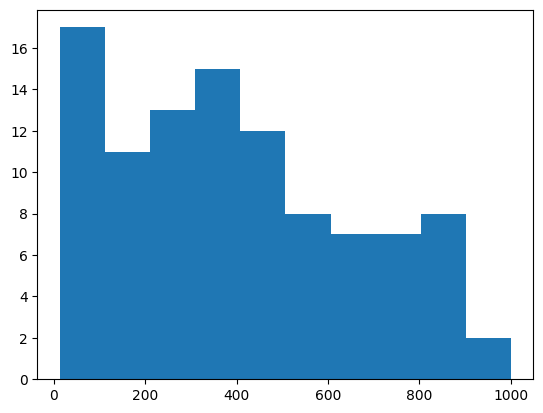

In [34]:
plt.hist(game_outcomes['Rounds'])
plt.show()

In [35]:
agent_losses = sum([agent[3] for agent in game_outcomes['Agent']])
agent_wins = sum([agent[3] for agent in game_outcomes['Other player(s)']])
game_not_ended = 100 - agent_losses - agent_wins

print(f'Out of 100 games with 2 players, run for 1000 decisions, using a base strategy, the agent won \n {agent_wins} games, the other player won {agent_losses} games. The other {game_not_ended} games did not end in this time period.')

Out of 100 games with 2 players, run for 1000 decisions, using a base strategy, the agent won 
 23 games, the other player won 3 games. The other 74 games did not end in this time period.


In [99]:
property_names = [
    "Old Kent Road",
    "Whitechapel Road",
    "The Angel Islington",
    "Euston Road",
    "Pentonville Road",
    "Pall Mall",
    "Whitehall",
    "Northumberland Avenue",
    "Bow Street",
    "Marlborough Street",
    "Vine Street",
    "Strand",
    "Fleet Street",
    "Trafalgar Square",
    "Leicester Square",
    "Coventry Street",
    "Piccadilly",
    "Regent Street",
    "Oxford Street",
    "Bond Street",
    "Park Lane",
    "Mayfair",
    "King's Cross Station",
    "Marylebone Station",
    "Fenchurch Street Station",
    "Liverpool Street Station",
    "Electric Company",
    "Water Works"
]


In [100]:
props_bought_player = [0]*28
props_bought_agent = [0]*28

for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx] += 0.01
        else:
            pass

for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+22] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx+22] += 0.01
        else:
            pass

for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+26] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx+26] += 0.01
        else:
            pass

In [160]:
def wilson_score_interval(p, n, z):
    z_squared = z**2
    phat = p + z_squared / (2 * n)
    margin_of_error = z * np.sqrt((p * (1 - p) / n) + z_squared / (4 * n))
    
    ci_lower = (phat - margin_of_error) / (1 + z_squared / n)
    ci_upper = (phat + margin_of_error) / (1 + z_squared / n)
    
    return ci_lower, ci_upper


In [163]:
ci_lower_props_bought_player = [0]*28
ci_lower_props_bought_agent = [0]*28
ci_upper_props_bought_player = [0]*28
ci_upper_props_bought_agent = [0]*28

z = norm.ppf(0.975)
n = 100

for idx, p in enumerate(props_bought_player):
    ci_lower, ci_upper = wilson_score_interval(p, n, z)
    ci_lower_props_bought_player[idx] = p - ci_lower
    ci_upper_props_bought_player[idx] = ci_upper - p

for idx, p in enumerate(props_bought_agent):
    ci_lower, ci_upper = wilson_score_interval(p, n, z)
    ci_lower_props_bought_agent[idx] = p - ci_lower
    ci_upper_props_bought_agent[idx] = ci_upper - p

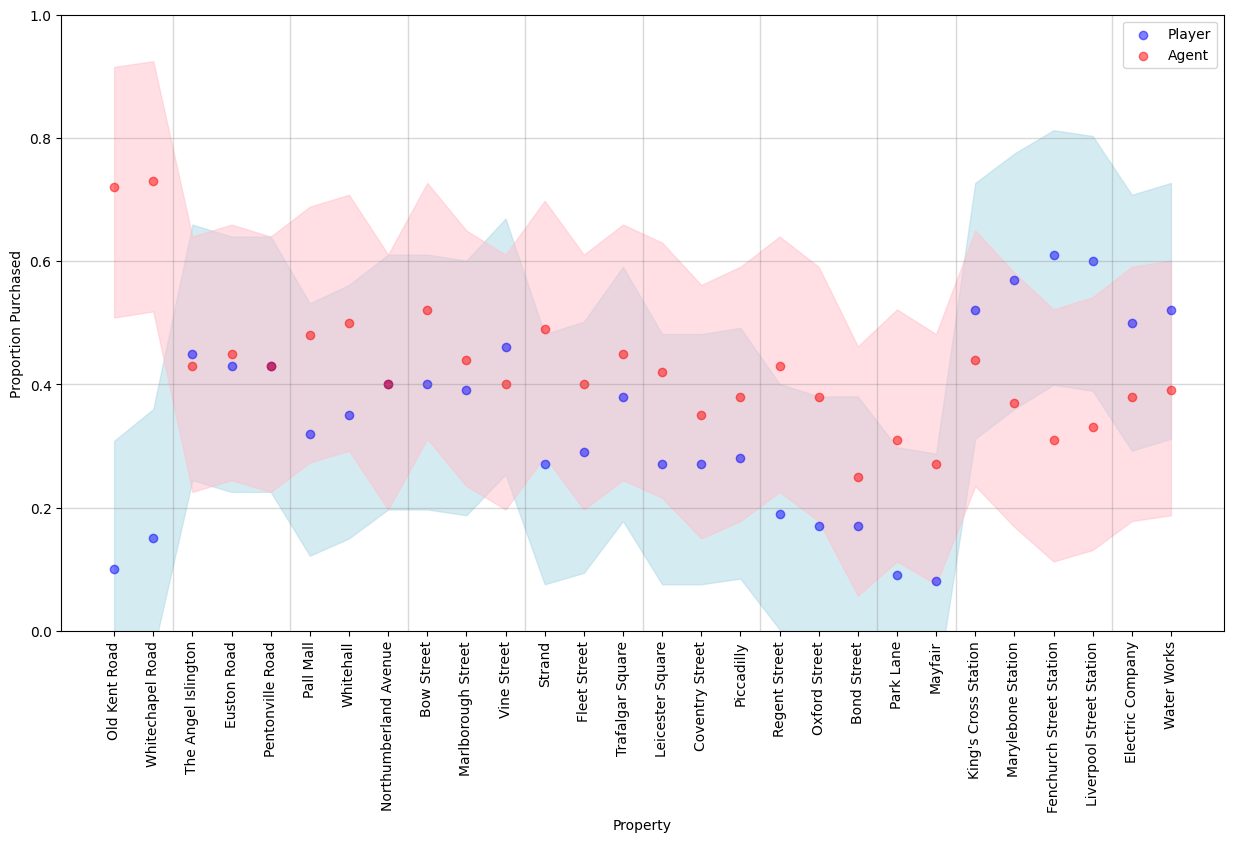

In [162]:
x = range(28)
plt.figure(figsize=(15, 8))

vertical_lines = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 21.5, 25.5]
for i in range(len(vertical_lines)):
    plt.axvline(vertical_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

horizontal_lines = [0.2, 0.4, 0.6, 0.8]
for i in range(len(horizontal_lines)):
    plt.axhline(horizontal_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

plt.fill_between(x, ci_lower_props_bought_player, ci_upper_props_bought_player, color='lightblue', alpha=0.5)
plt.fill_between(x, ci_lower_props_bought_agent, ci_upper_props_bought_agent, color='pink', alpha=0.5)
plt.scatter(x, props_bought_player, alpha = 0.5, color = 'blue', label = 'Player')
plt.scatter(x, props_bought_agent, alpha = 0.5, color = 'red', label = 'Agent')
    
plt.xticks(x, property_names, rotation = 90)
plt.ylim(0, 1)
plt.xlabel('Property')
plt.ylabel('Proportion Purchased')
plt.legend()
plt.show()

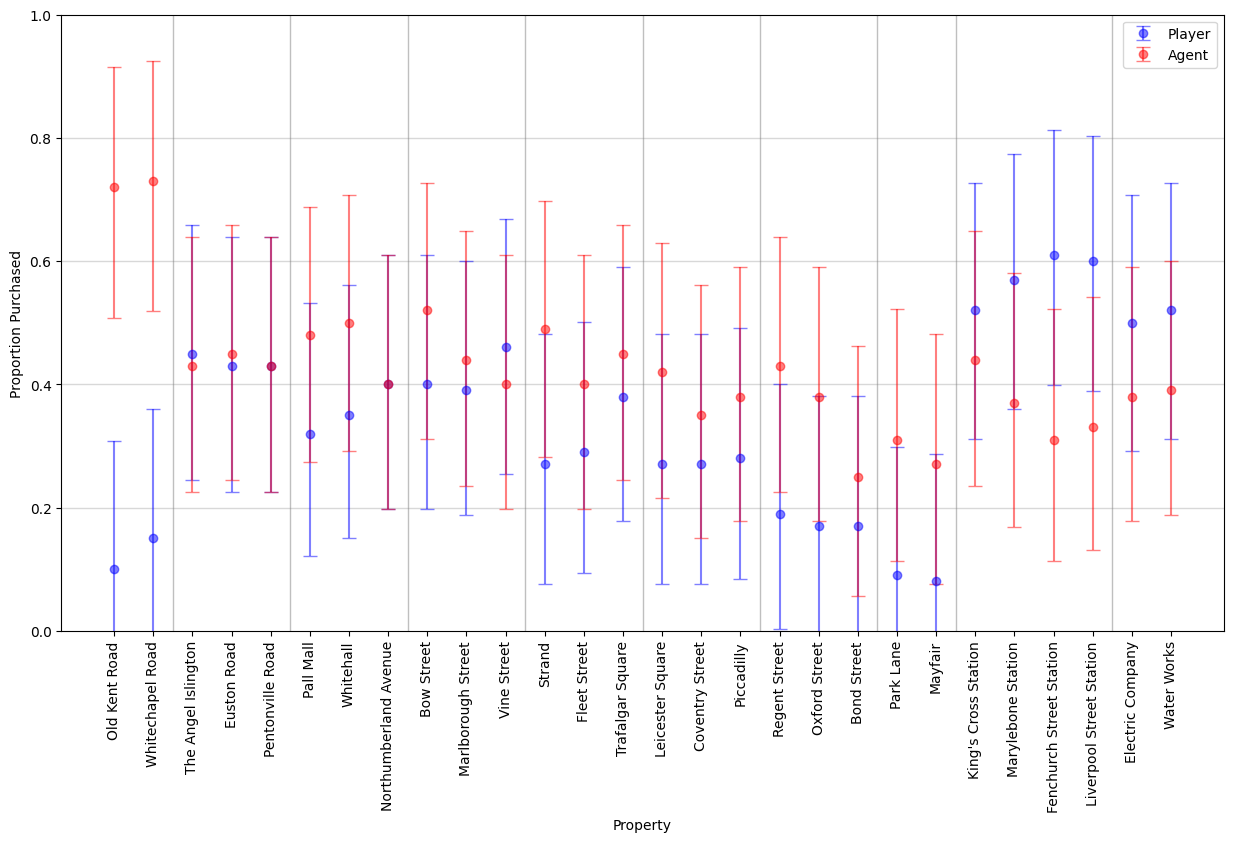

In [164]:
x = range(28)
plt.figure(figsize=(15, 8))

vertical_lines = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 21.5, 25.5]
for i in range(9):
    plt.axvline(vertical_lines[i], alpha = 0.5, color = 'gray', linewidth = 1)

horizontal_lines = [0.2, 0.4, 0.6, 0.8]
for i in range(len(horizontal_lines)):
    plt.axhline(horizontal_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

plt.errorbar(x, props_bought_player, yerr=[ci_lower_props_bought_player, ci_upper_props_bought_player], alpha = 0.5, fmt='o', color='blue', capsize=5, label='Player')
plt.errorbar(x, props_bought_agent, yerr=[ci_lower_props_bought_agent, ci_upper_props_bought_agent], alpha = 0.5, fmt='o', color='red', capsize=5, label='Agent')
    
plt.xticks(x, property_names, rotation = 90)
plt.ylim(0, 1)
plt.xlabel('Property')
plt.ylabel('Proportion Purchased')
plt.gca().xaxis.grid(False)
plt.legend()
plt.show()

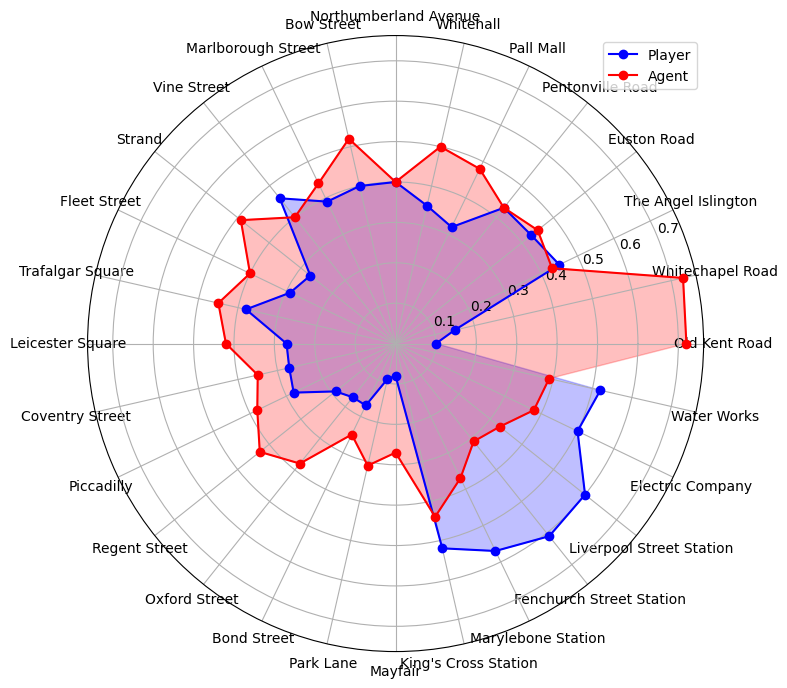

In [165]:
theta = np.linspace(0, 2 * np.pi, len(props_bought_player), endpoint=False)

plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

plt.plot(theta, props_bought_player, 'o-', color='blue', label='Player')
plt.plot(theta, props_bought_agent, 'o-', color='red', label='Agent')
plt.fill(theta, props_bought_player, color='blue', alpha=0.25)
plt.fill(theta, props_bought_agent, color='red', alpha=0.25)
plt.thetagrids(np.arange(0, 360, 360 / len(property_names)), labels=property_names)
plt.legend()
plt.show()

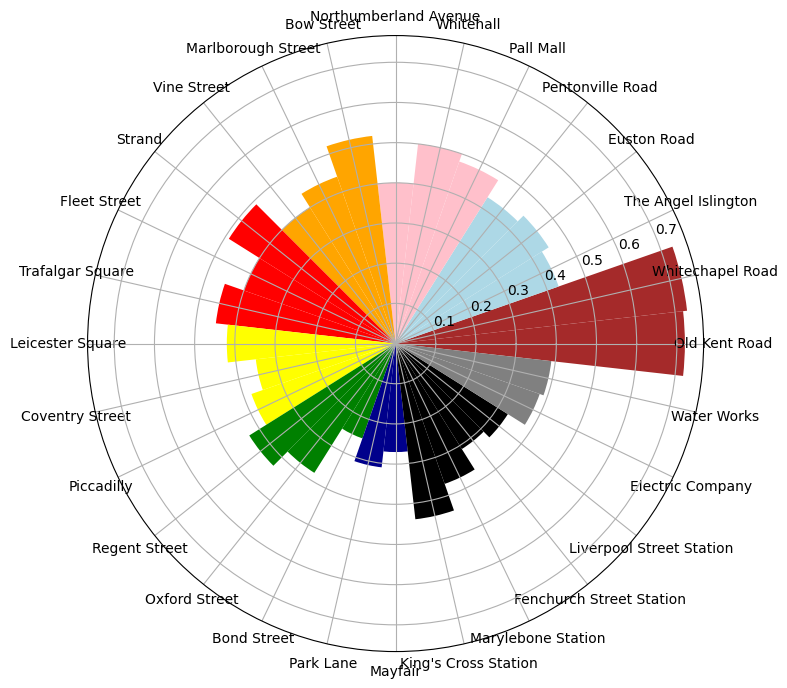

In [168]:
bar_colours = ['brown', 'brown', 'lightblue', 'lightblue', 'lightblue', 'pink', 'pink', 'pink',
               'orange', 'orange', 'orange', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 
               'green', 'green', 'green', 'darkblue', 'darkblue', 'black', 'black', 'black',
               'black', 'grey', 'grey']

theta = np.linspace(0, 2 * np.pi, len(props_bought_agent), endpoint=False)

plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

width = 2 * np.pi / len(props_bought_agent)

for i in range(len(props_bought_agent)):
    plt.bar(theta[i], props_bought_agent[i], width=width, color=bar_colours[i])

plt.thetagrids(np.arange(0, 360, 360 / len(property_names)), labels=property_names)
plt.show()

In [173]:
num_props_bought_agent = [0] * 100
num_props_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Properties']):
    for prop in game:
        if prop[0] == 'Agent':
            num_props_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_props_bought_player[idx] += 1
        else:
            pass

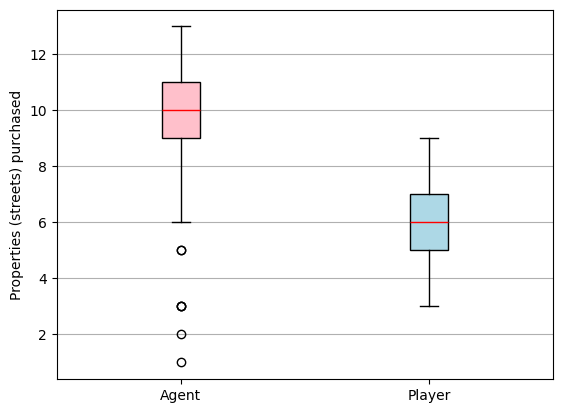

In [216]:
fig, ax = plt.subplots()
box = ax.boxplot([num_props_bought_agent, num_props_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='red')

ax.set_xticks([1, 2])
ax.set_xticklabels(['Agent', 'Player']) 
plt.ylabel('Properties (streets) purchased')
plt.grid(axis='y')
plt.show()

In [211]:
num_stations_bought_agent = [0] * 100
num_stations_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Stations']):
    for prop in game:
        if prop[0] == 'Agent':
            num_stations_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_stations_bought_player[idx] += 1
        else:
            pass

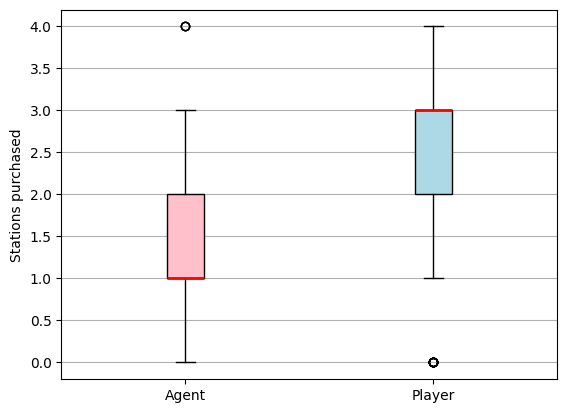

In [223]:
fig, ax = plt.subplots()
box = ax.boxplot([num_stations_bought_agent, num_stations_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_xticklabels(['Agent', 'Player']) 
plt.ylabel('Stations purchased')
plt.grid(axis='y')
plt.show()

In [221]:
num_utilities_bought_agent = [0] * 100
num_utilities_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Utilities']):
    for prop in game:
        if prop[0] == 'Agent':
            num_utilities_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_utilities_bought_player[idx] += 1
        else:
            pass

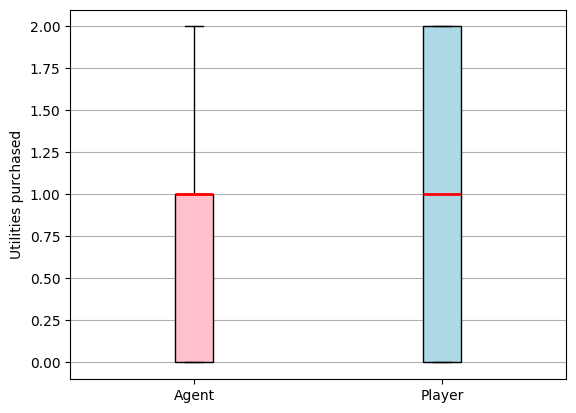

In [224]:
fig, ax = plt.subplots()
box = ax.boxplot([num_utilities_bought_agent, num_utilities_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_xticklabels(['Agent', 'Player']) 
plt.ylabel('Utilities purchased')
plt.grid(axis='y')
plt.show()